In [31]:
import math
import numpy as np
import ROOT
import array
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
def dati_tdc(fname):
    f = open(fname, "r")
    lines = f.read().split("\n")
    d1 = {}
    num  = 0 
    Events = []
    for i in range(4,len(lines)-4,4):
        event = []
        line1 = lines[i]. split("\t")
        #print(line1)
        line2 = lines[i+1].split("\t")
        line3 = lines[i+2].split("\t")
        line4 = lines[i+3].split("\t")
        col  = [int(line1[0]), int(line2[0]), int(line3[0]), int(line4[0])]
        event.append(col)
        Events.append(col)
        d1[num] = event
        num += 1
    return Events, d1

    

# Common stop

In [61]:
fname = "Misure 15_5"
names  = [1000,1140,830,640,580,480,710,1010,4000,5000,2680,1960,3520,6200,
          3000,8000,9200,19800,30400,25400,15400,11200]
ch_values= []
ch_std = []
ch_err  =[]
for i in names:
    fname1 = fname + "/" +str(i) + "ns.txt"
    Data, d1 = dati_tdc(fname1)
    #print(Data)
    #print(Data)
    ch = [j[3] for j in Data]
    #print(ch)
    ch = np.array(ch)
    mean = np.mean(ch)
    std = np.std(ch)
    ch_values.append(mean)
    ch_std.append(std)
    ch_err.append(std/(math.sqrt(len(ch))))

In [62]:
scale = [250,250,250,250,250,250,250,1000,2500,2500,1000,1000,1000,2500,1000,5000,5000,5000,10000,10000,5000,5000]
err_rit = 1/10 * np.array(scale)
err_rit

array([  25.,   25.,   25.,   25.,   25.,   25.,   25.,  100.,  250.,
        250.,  100.,  100.,  100.,  250.,  100.,  500.,  500.,  500.,
       1000., 1000.,  500.,  500.])

In [63]:
line = ROOT.TF1("f","[0]+ [1]*x")

 FCN=1.92541 FROM MIGRAD    STATUS=CONVERGED      34 CALLS          35 TOTAL
                     EDM=3.77442e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           6.20020e+01   1.30838e+01   7.69795e-03  -6.96138e-05
   2  p1           1.05107e+00   1.19056e-02   7.00479e-06  -1.03497e-01


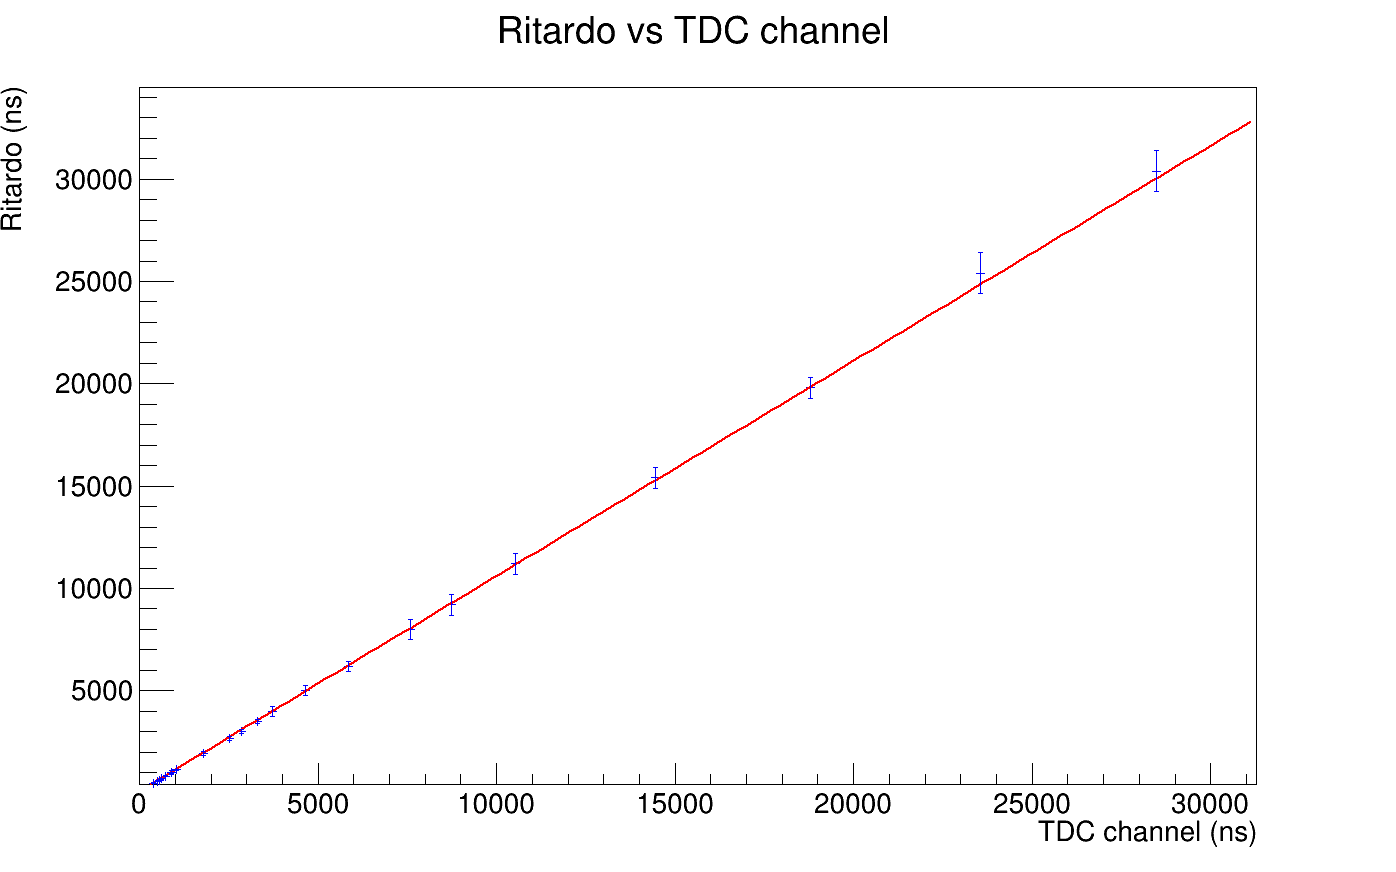

In [64]:
c1 = ROOT.TCanvas("", "",1400, 900)
g1 = ROOT.TGraphErrors(len(names), array.array("f", ch_values), array.array("f", names), 
                      array.array("f", ch_err), array.array("f", err_rit))
g1.SetMarkerStyle(2)
g1.SetTitle("Ritardo vs TDC channel")
g1.SetMarkerColor(4)
g1.SetLineColor(4)
g1.GetXaxis().SetTitle("TDC channel (ns)")
g1.GetYaxis().SetTitle("Ritardo (ns)")
g1.Fit("f")
g1. Draw("AP")
c1.Draw()

$Ax+B$ con
$A = 1.05 \pm 0.01$
$B = 62 \pm 13$


In [68]:
A_stop = 1.05
B_stop  =62
print(A_stop * 180+ B_stop)
print(ch_values)
print(names)

251.0
[897.3535353535353, 1041.357142857143, 727.8775510204082, 549.0204081632653, 489.66326530612247, 389.6020408163265, 607.704081632653, 902.4387755102041, 3731.1111111111113, 4632.84693877551, 2518.8367346938776, 1784.9183673469388, 3309.1326530612246, 5852.397959183673, 2843.4897959183672, 7573.734693877551, 8731.857142857143, 18801.479591836734, 28469.051020408162, 23548.724489795917, 14442.448979591836, 10534.530612244898]
[1000, 1140, 830, 640, 580, 480, 710, 1010, 4000, 5000, 2680, 1960, 3520, 6200, 3000, 8000, 9200, 19800, 30400, 25400, 15400, 11200]


# Common START

In [40]:
fname = "common_start_260623"
names_2  = [6800,8100,3900,29600,9200,12000,15200,20000,24800,17200,30400,22400,1680,13400,1700,25600,28800]
ch_values_2= []
ch_std_2 = []
ch_err_2  =[]
for i in names_2:
    fname1 = fname + "/" +str(i) + "ns.txt"
    #print(fname1)
    Data, d1 = dati_tdc(fname1)
    ch = [j[3] for j in Data]
    ch = np.array(ch)
    mean = np.mean(ch)
    std = np.std(ch)
    ch_values_2.append(mean)
    ch_std_2.append(std)
    ch_err_2.append(std/(math.sqrt(len(ch))))

In [41]:
scale_2 = [2500,2500,2500,10000,5000,5000,5000,10000,10000,5000,10000,10000,1000,5000,500,10000,10000]
err_rit_2 = 1/10 * np.array(scale)
err_rit_2

array([  25.,   25.,   10.,   25.,   25.,   25.,   25.,   25.,  100.,
        250.,  250.,  100.,  100.,  100.,  250.,  100.,  500.,  500.,
        500., 1000., 1000.,  500.,  500.])

 FCN=60.9853 FROM MIGRAD    STATUS=CONVERGED      35 CALLS          36 TOTAL
                     EDM=8.48794e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -1.40343e+02   1.14466e+01   2.68207e-02   1.79927e-05
   2  p1           1.04118e+00   9.54095e-04   2.23556e-06   2.07708e-01


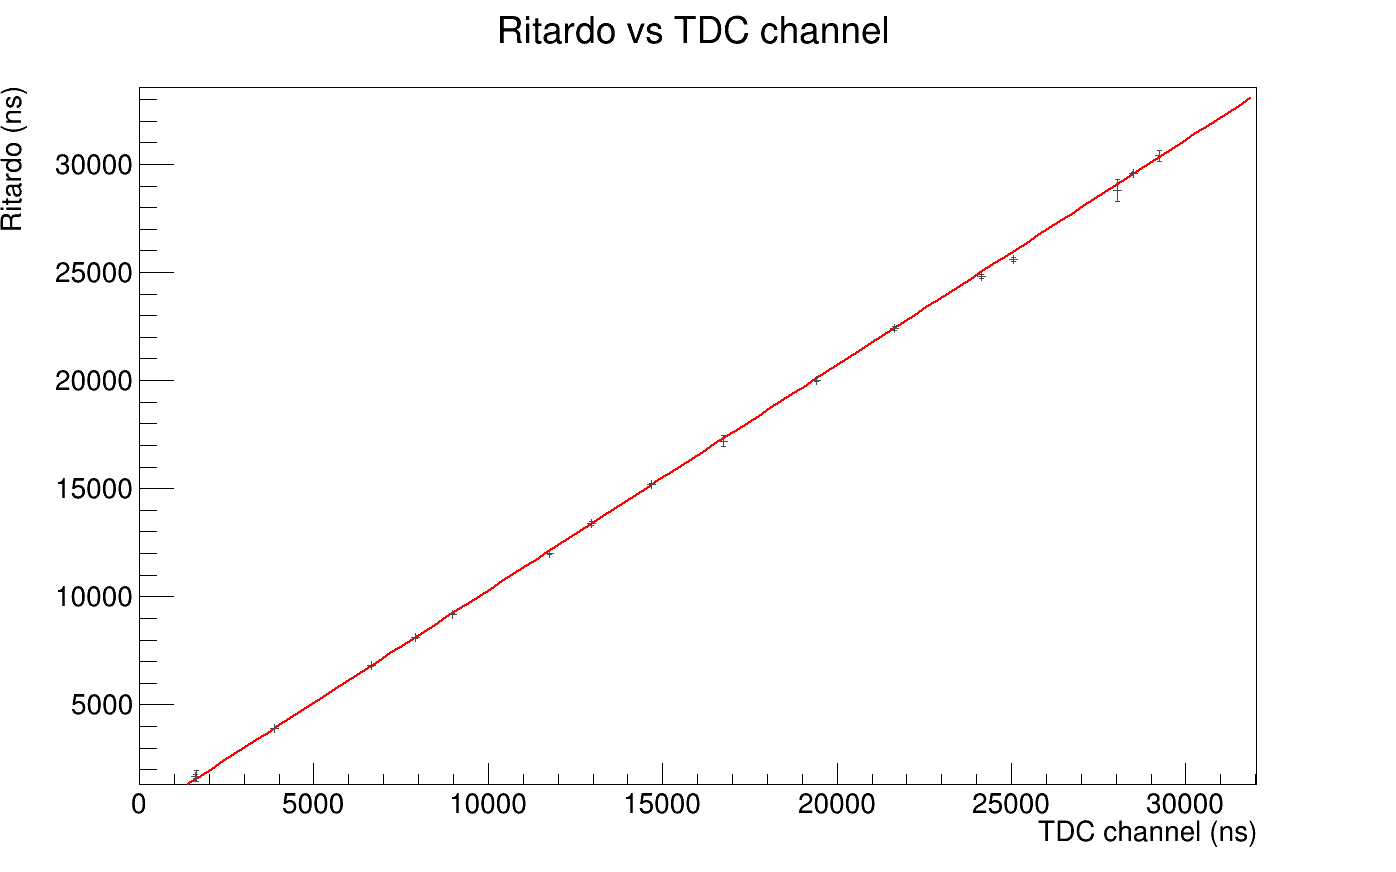

In [42]:
c1 = ROOT.TCanvas("", "",1400, 900)
g1 = ROOT.TGraphErrors(len(names_2), array.array("f", ch_values_2), array.array("f", names_2), 
                      array.array("f", ch_err_2), array.array("f", err_rit_2))
g1.SetMarkerStyle(2)
g1.SetTitle("Ritardo vs TDC channel")
g1.SetMarkerColor(12)
g1.SetLineColor(12)
g1.GetXaxis().SetTitle("TDC channel (ns)")
g1.GetYaxis().SetTitle("Ritardo (ns)")
g1.Fit("f")
g1.Draw("AP")
c1.Draw()

$Ax+B$ con
$A = 1.041 \pm 0.001$
$B = -140 \pm 11$

prova di conversione

In [43]:
A_start = 1.041
B_start = -130
time_values_2 = A_start * np.array(ch_values_2) + B_start 

In [46]:
names_2

[6800,
 8100,
 3900,
 29600,
 9200,
 12000,
 15200,
 20000,
 24800,
 17200,
 30400,
 22400,
 1680,
 13400,
 1700,
 25600,
 28800]

In [47]:
time_values_2

array([ 6779.464     ,  8103.44775758,  3905.5889697 , 29523.87342424,
        9212.06018182, 12110.87715152, 15141.51206061, 20077.02975758,
       24990.24481818, 17299.41042424, 30322.80412121, 22389.69001053,
        1550.39481818, 13359.41469697,  1579.49024242, 25951.50842424,
       29050.5969697 ])